Obesity PCA data not found, training PCA now...


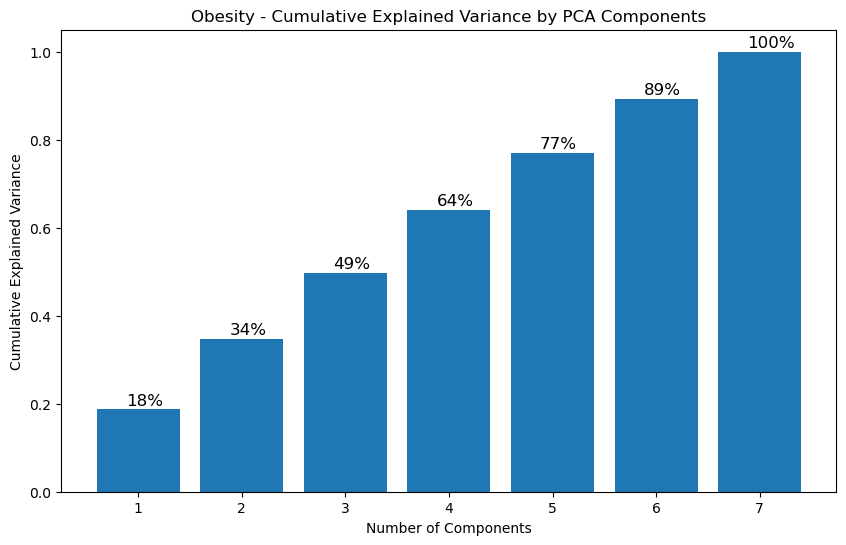

hyperlipidemia PCA data not found, training PCA now...


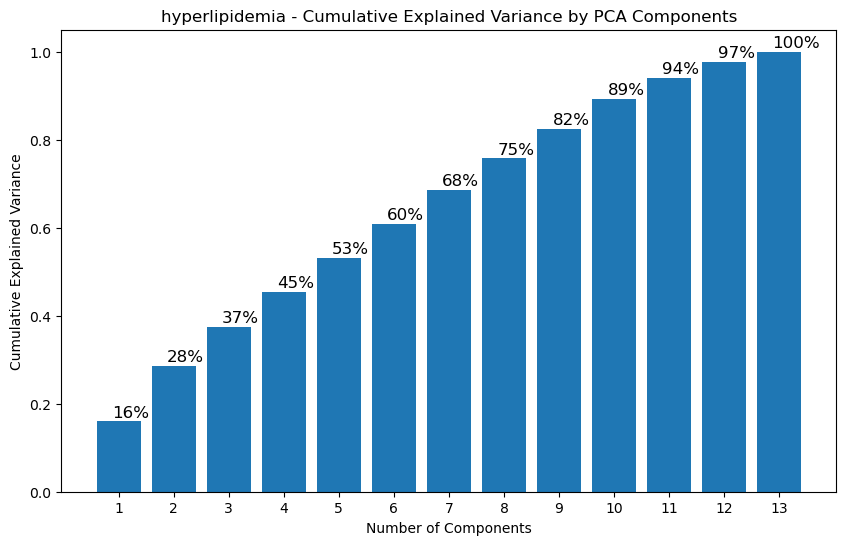

diabetes PCA data not found, training PCA now...


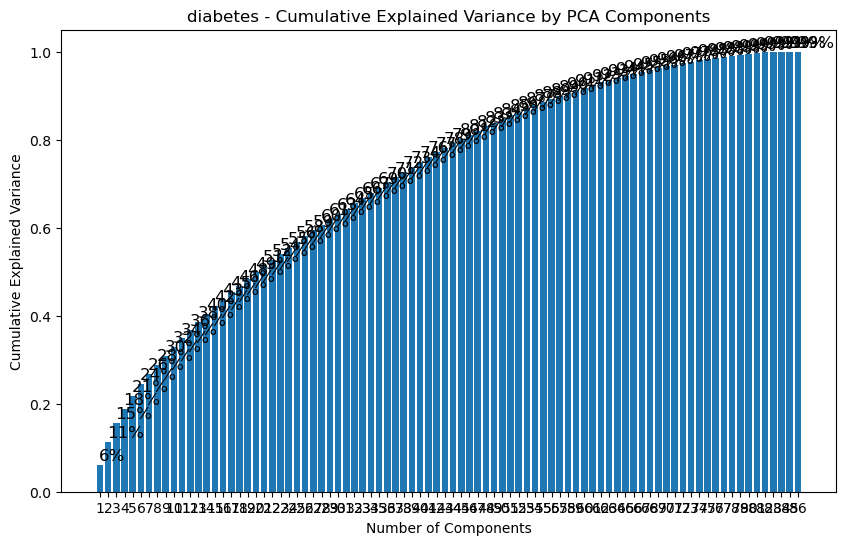

hypertension PCA data not found, training PCA now...


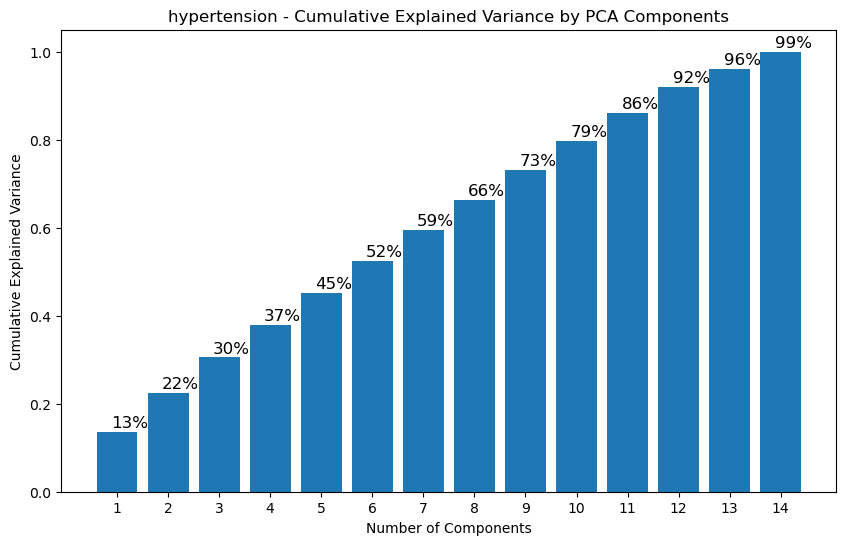

nicotine PCA data not found, training PCA now...


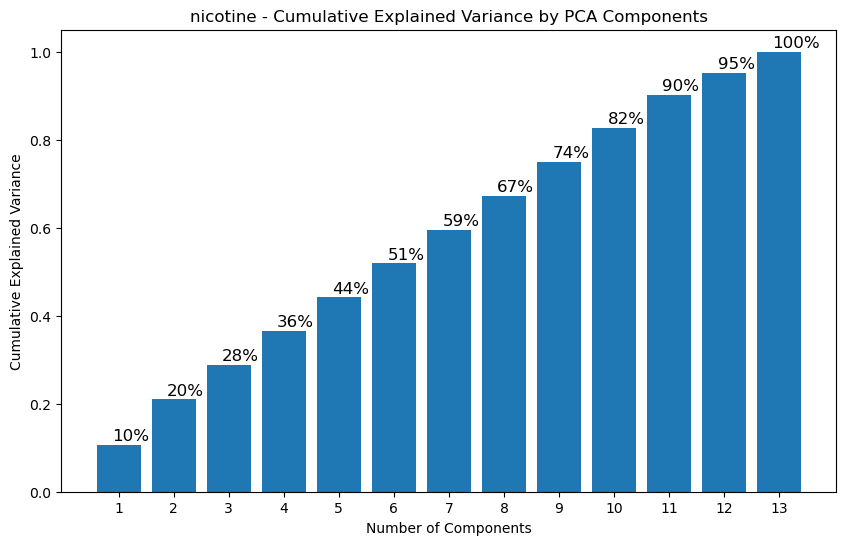

alcohol PCA data not found, training PCA now...


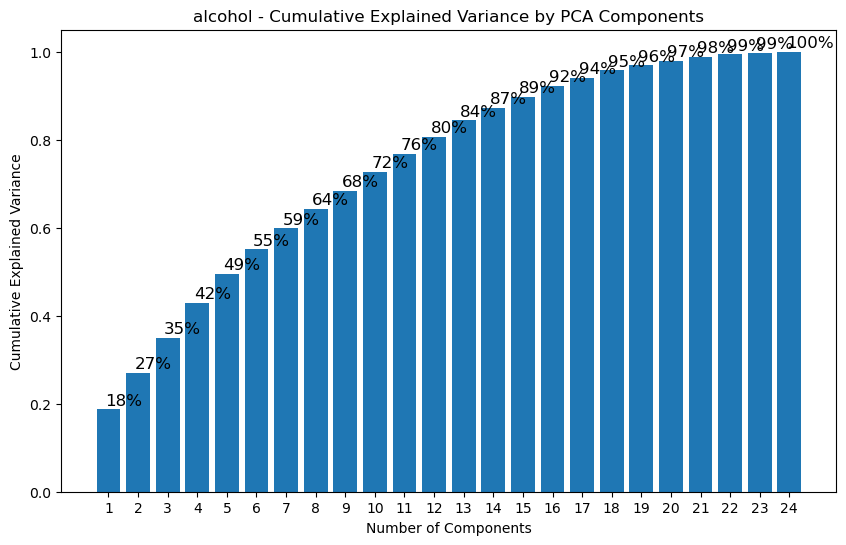

af PCA data not found, training PCA now...


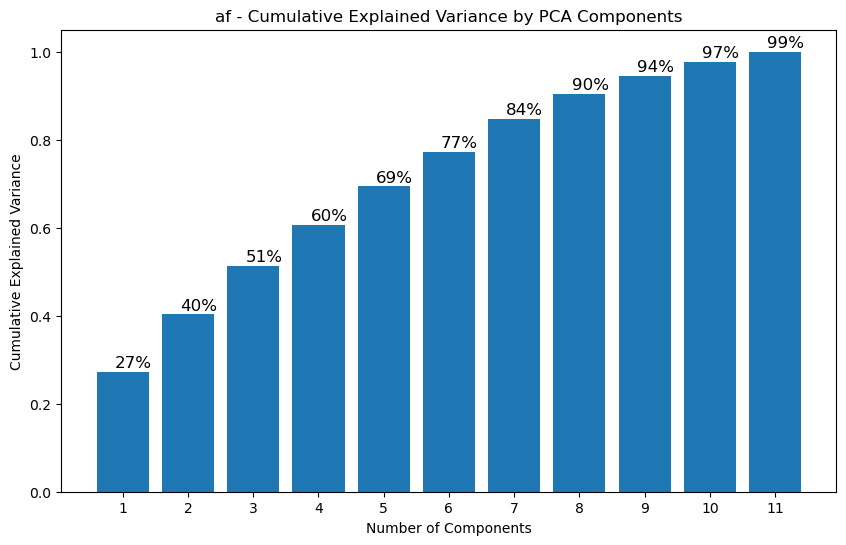

heart_diseases PCA data not found, training PCA now...


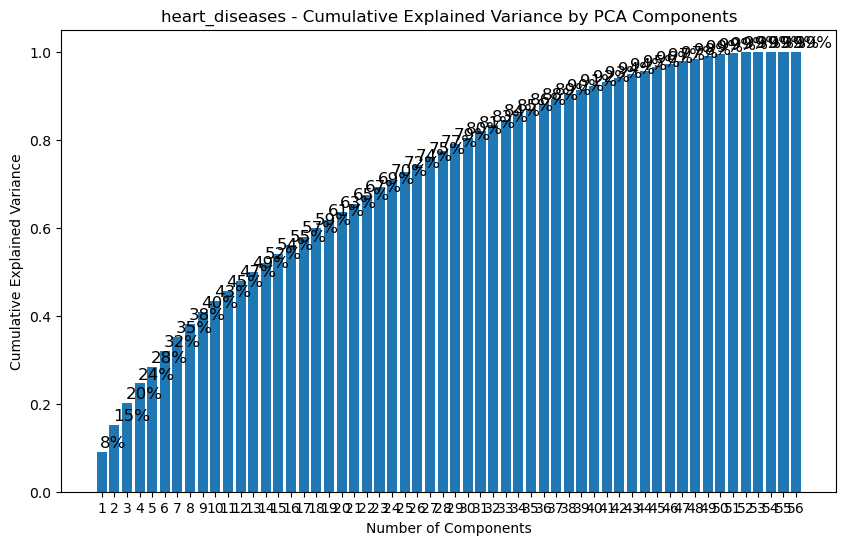

strokes PCA data not found, training PCA now...


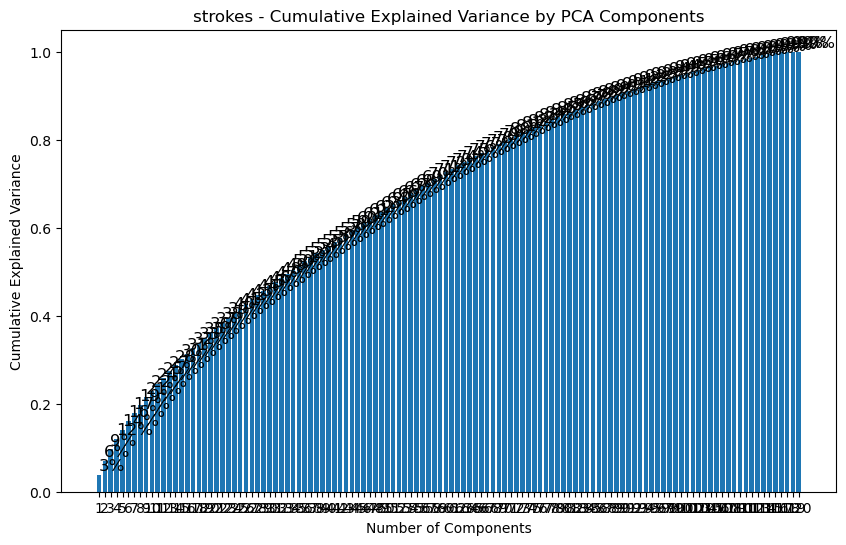

Neural Network feature data not found, training Neural Network now...
Test Accuracy after epoch [1/101]: 0.5767
Test Accuracy after epoch [6/101]: 0.7017
Test Accuracy after epoch [11/101]: 0.7055
Test Accuracy after epoch [16/101]: 0.7149
Test Accuracy after epoch [21/101]: 0.7178
Test Accuracy after epoch [26/101]: 0.7185
Test Accuracy after epoch [31/101]: 0.7204
Test Accuracy after epoch [36/101]: 0.7163
Test Accuracy after epoch [41/101]: 0.7185
Test Accuracy after epoch [46/101]: 0.7200
Test Accuracy after epoch [51/101]: 0.7166
Test Accuracy after epoch [56/101]: 0.7214
Test Accuracy after epoch [61/101]: 0.7185
Test Accuracy after epoch [66/101]: 0.7180
Test Accuracy after epoch [71/101]: 0.7168
Test Accuracy after epoch [76/101]: 0.7212
Test Accuracy after epoch [81/101]: 0.7197
Test Accuracy after epoch [86/101]: 0.7171
Test Accuracy after epoch [91/101]: 0.7219
Test Accuracy after epoch [96/101]: 0.7151
Test Accuracy after epoch [101/101]: 0.7163
Neural Network training fini

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from preprocessing import preprocessing
from pca import pca_load
from pca_all import pca_load_all
from baseline import baseline
from lr import LR
#from lr import LR_P
from rf import RF
from nn import nn_load
from ae import ae_load
from nn_rf import nn_separate_load
from roc import ROC

from sklearn.metrics import accuracy_score

# short code or full code
#code_type = "short"
code_type = "full"

if code_type == "short":
    filename = "main_dataset_final_3"
elif code_type == "full":
    filename = "main_dataset_final_3_full_icd10"
    
#preprocessing(filename)

# binary or continuous
datatype = "binary"
# datatype = "cont"
filename_add = int(code_type == "full")
X = pd.read_csv("data/stroke_data_" + datatype + filename_add*"_full" + ".csv")
X.dropna(inplace=True)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# disease_mapping = {
#     "Obesity": ['E65','E66','E67','E68'], 
#     "hyperlipidemia": ['E78'],
#     "diabetes": ['E10','E11','E12','E13','E14'],
#     "hypertension": ['I10','I11','I12','I13','I15'],
#     "nicotine":['F17','Z72'],
#     "alcohol":['F10'],
#     "af":['I48'],
#     "heart_diseases":['I20','I21','I22','I24','I25'],
#     "strokes":['I63','I64','I60','G45','I61'],
# }

# reverse_mapping = {}
# for category, codes in disease_mapping.items():
#     for code in codes:
#         reverse_mapping[code] = category

# columns_by_category = {category: [] for category in disease_mapping}

# for column in X_train.columns:
#     for code in reverse_mapping.keys():
#         if column.startswith(code):
#             category = reverse_mapping[code]
#             columns_by_category[category].append(column)
#             break

# disease_mapping = columns_by_category
# for category, columns in columns_by_category.items():
#     print(f"Category '{category}' has columns: {columns}")
# ###

# last_key = next(reversed(columns_by_category))
# last_value = columns_by_category[last_key]
# X_train["stroke"] = X_train[last_value].sum(axis=1)
# X_test["stroke"] = X_test[last_value].sum(axis=1)

disease_mapping = {
    "Obesity": ['E65','E66','E67','E68'], 
    "hyperlipidemia": ['E78'],
    "diabetes": ['E10','E11','E12','E13','E14'],
    "hypertension": ['I10','I11','I12','I13','I15'],
    "nicotine":['F17','Z72'],
    "alcohol":['F10'],
    "af":['I48'],
    "heart_diseases":['I20','I21','I22','I24','I25'],
    "strokes":['I63','I64','I60','G45','I61'],
}

# pca vs. baseline
train, test = pca_load(datatype, disease_mapping, X_train, X_test, code_type, pc0_only=True)
# #X_train, X_test = pca_load_all(datatype, X_train, X_test)
max_train, max_test = baseline(datatype, disease_mapping, "max", X_train, X_test)
sum_train, sum_test = baseline(datatype, disease_mapping, "sum", X_train, X_test)
nn_train, nn_test = nn_load(datatype, disease_mapping, X_train, X_test, code_type)
ae_train, ae_test = ae_load(datatype, disease_mapping, X_train, X_test, code_type)
# nn_rf_train, nn_rf_test = nn_separate_load(datatype, disease_mapping, X_train, X_test, code_type)


print(train.shape, test.shape)
print(max_train.shape, max_test.shape)
print(sum_train.shape, sum_test.shape)
print(nn_train.shape,nn_test.shape)
print(ae_train.shape,ae_test.shape)
# print(nn_rf_train.shape, nn_rf_test.shape)

# Binary

In [ ]:
# # orginal data with all covariates

# X = pd.read_csv("data/stroke_data_binary.csv")
# X.dropna(inplace=True)
# #X= X[X['race'] != 'Black or African American']
# or_train, or_test = train_test_split(X, test_size=0.2, random_state=42)
# print("By Logistic Regression, result for all original predicitors:")
# LR(or_train,or_test,tolerance = 1e-4,iter = 6000, seed = 43)

# param_grid = {
#     'n_estimators': [100],  
#     'max_features': [0.2, 0.4],  
#     'max_depth': [10, 20],  
#     'min_samples_split': [5, 10],  
#     'min_samples_leaf': [2, 4],  
#     'bootstrap': [True, False]  
# }
# print("Result for Random Forest, result for all original predicitors:")
# RF(or_train,or_test,params=param_grid)

In [6]:
# Logistic Regression
# We select several comorbidities and demographics as the predictors.

# ## baseline: orginal data with the max_aggregation covariates
# print("By Logistic Regression, result for sum baseline:")
# LR(sum_train,sum_test,tolerance = 1e-4,iter = 4000, seed = 43)
# print("By Logistic Regression, result for max baseline:")
# LR(max_train,max_test,tolerance = 1e-4,iter = 4000, seed = 43)
# ## selected PCA covariates.
# print("By Logistic Regression, result for PCA:")
# LR(train,test,tolerance = 1e-4,iter = 4000, seed = 43)
# print("By Logistic Regression, result for NN:")
# LR(nn_train,nn_test,tolerance = 1e-4,iter = 4000, seed = 43)
# print("By Logistic Regression, result for Autoencoder:")
# LR(ae_train,ae_test,tolerance = 1e-4,iter = 4000, seed = 43)
# # print("By Logistic Regression, result for NN_RF:")
# # LR(nn_rf_train,nn_rf_test,tolerance = 1e-4,iter = 4000, seed = 43)

By Logistic Regression, result for sum baseline:
[[ 0.21454341  0.04852612  0.03948852  0.07175898  0.28130439  0.32215517
   0.02559743 -0.09704927  0.0989995  -0.0038694   0.50505409 -0.26746859
   0.363461   -0.67020838 -0.06211451 -0.00704736  0.08198297  0.10631705
  -0.32163304  0.11108601 -0.04691486]]
Accuracy: 0.6761377317601733
Recall: 0.7402922755741127
By Logistic Regression, result for max baseline:
[[ 0.5018714   0.28310343  0.18010386  0.26924388  0.4428857   0.63234002
   0.19580314 -0.04651227  0.21428064 -0.00819185  0.67389335 -0.2772763
   0.38993418 -0.84191517 -0.04577001 -0.00959393  0.19739046 -0.08253024
  -0.33337467  0.22111318 -0.05796267]]
Accuracy: 0.6679508788827354
Recall: 0.8091858037578288
By Logistic Regression, result for PCA:
[[ 0.29793644  0.0273088   0.05535996 -0.00148605  0.13300519  0.14881857
  -0.00647234 -0.02978144  0.05400308 -0.00323249  0.81858745 -0.27176679
   0.68318631 -0.79693729  0.16122139  0.27184829  0.23112983  0.00216384
  -0.

(array([0.36388827, 0.41289205, 0.63005731, ..., 0.78433235, 0.83564429,
        0.34961525]),
 0.6479653262701661,
 0.7820459290187891)

[[ 0.21454341  0.04852612  0.03948852  0.07175898  0.28130439  0.32215517
   0.02559743 -0.09704927  0.0989995  -0.0038694   0.50505409 -0.26746859
   0.363461   -0.67020838 -0.06211451 -0.00704736  0.08198297  0.10631705
  -0.32163304  0.11108601 -0.04691486]]
Accuracy: 0.6761377317601733
Recall: 0.7402922755741127
[[ 0.5018714   0.28310343  0.18010386  0.26924388  0.4428857   0.63234002
   0.19580314 -0.04651227  0.21428064 -0.00819185  0.67389335 -0.2772763
   0.38993418 -0.84191517 -0.04577001 -0.00959393  0.19739046 -0.08253024
  -0.33337467  0.22111318 -0.05796267]]
Accuracy: 0.6679508788827354
Recall: 0.8091858037578288
[[ 0.29793644  0.0273088   0.05535996 -0.00148605  0.13300519  0.14881857
  -0.00647234 -0.02978144  0.05400308 -0.00323249  0.81858745 -0.27176679
   0.68318631 -0.79693729  0.16122139  0.27184829  0.23112983  0.00216384
  -0.17743635  0.33620275  0.04100961]]
Accuracy: 0.6590416566337587
Recall: 0.7707724425887265
[[ 8.12725786e-01 -5.38199633e-01 -1.16933074e+

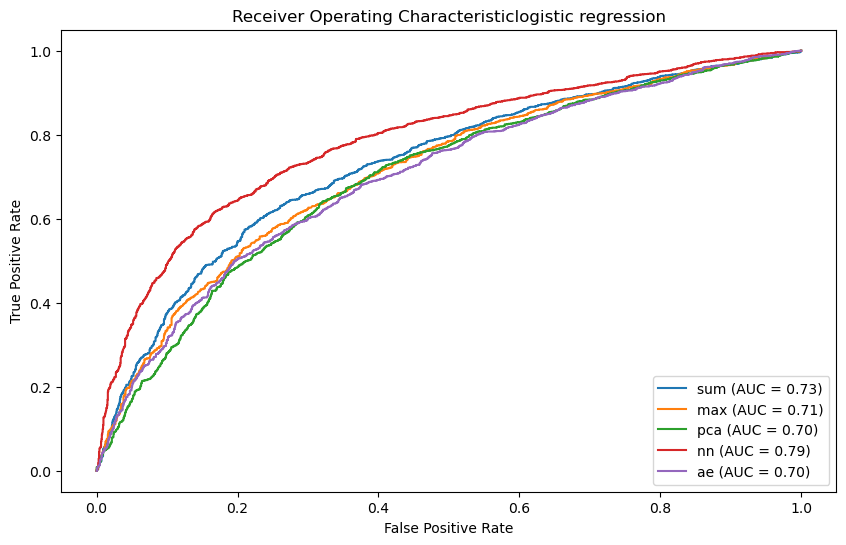

In [12]:
Y_scores_sum, accuracy_sum, recall_sum = LR(sum_train,sum_test,tolerance = 1e-4,iter = 4000, seed = 43)
Y_scores_max, accuracy_max, recall_max = LR(max_train,max_test,tolerance = 1e-4,iter = 4000, seed = 43)
Y_scores_pca, accuracy_pca, recall_pca = LR(train,test,tolerance = 1e-4,iter = 4000, seed = 43)
Y_scores_nn, accuracy_nn, recall_nn = LR(nn_train,nn_test,tolerance = 1e-4,iter = 4000, seed = 43)
Y_scores_ae, accuracy_ae, recall_ae = LR(ae_train,ae_test,tolerance = 1e-4,iter = 4000, seed = 43)
Y_scores = [Y_scores_sum, Y_scores_max, Y_scores_pca, Y_scores_nn, Y_scores_ae]
Y_true = test["recur"]

method = ["sum","max","pca","nn","ae"]
ROC(Y_true, Y_scores, method, LR = True)

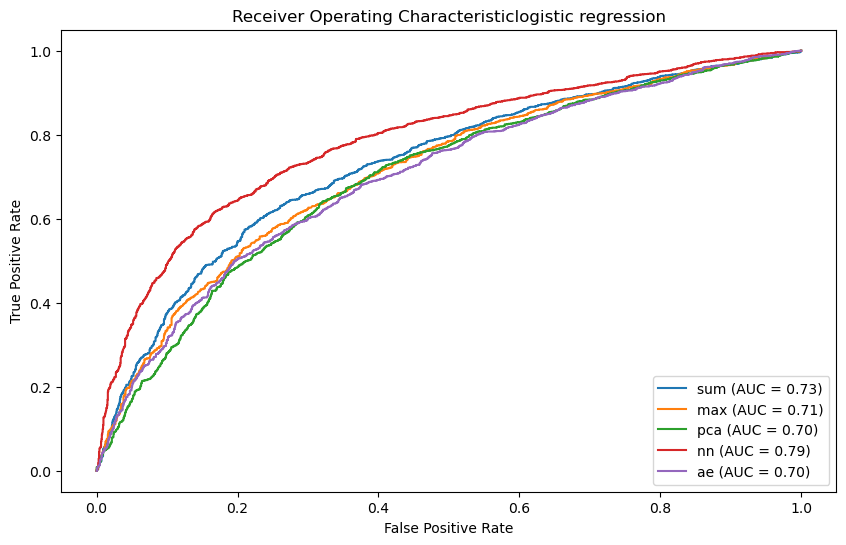

In [11]:
# file_path = 'data/'
# Y_scores = pd.DataFrame(Y_scores)
# Y_scores.to_csv(file_path + "scores.csv", index=False)
# Y_scores = Y_scores.values.tolist()

# Y_true = pd.DataFrame(Y_true)
# Y_true.to_csv(file_path + "true.csv", index=False)
# Y_true= Y_true.values.tolist()

# method = ["sum","max","pca","nn","ae"]
# ROC(Y_true, Y_scores, method, LR = True)

In [ ]:
# Random Forest
# We select several comorbidities and demographics as the predictors.
# Since the number of predicitors is not large, so here 'max_features' is not small.
param_grid = {
    'n_estimators': [100,200,300],  
    'max_features': [0.8, 0.9, 1],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True]  
}

## baseline: orginal data with the max_aggregation covariates
# print("By Random Forest, result for sum baseline:")
# RF(sum_train,sum_test,params=param_grid)
# print("By Random Forest, result for max baseline:")
# RF(max_train,max_test,params=param_grid)
# ## selected PCA covariates.
# print("By Random Forest, result for PCA:")
# RF(train,test,params=param_grid)
# print("By Random Forest, result for NN:")
# RF(nn_train,nn_test,params=param_grid)
# print("By Random Forest, result for Autoencoder:")
# RF(ae_train,ae_test,params=param_grid)
# print("By Random Forest, result for NN_RF:")
# RF(nn_rf_train,nn_rf_test,params=param_grid)


# print("By Random Forest, result for max baseline:")
# RF(max_train,max_test,params=param_grid)
# ## selected PCA covariates.
# print("By Random Forest, result for PCA:")
# RF(train,test,params=param_grid)
# print("By Random Forest, result for NN:")
# RF(nn_train,nn_test,params=param_grid)
# # print("By Random Forest, result for NN_RF:")
# # RF(nn_rf_train,nn_rf_test,params=param_grid)
# print("By Random Forest, result for sum baseline:")
# RF(sum_train,sum_test,params=param_grid)
# print("By Random Forest, result for Autoencoder:")
# RF(ae_train,ae_test,params=param_grid)


In [ ]:
param_grid = {
    'n_estimators': [100,200,300],  
    'max_features': [0.8, 0.9, 1],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True]  
}
Y_scores_sum, accuracy_sum, recall_sum = RF(sum_train,sum_test,tolerance = 1e-4,iter = 4000, seed = 43)
Y_scores_max, accuracy_max, recall_max = RF(max_train,max_test,tolerance = 1e-4,iter = 4000, seed = 43)
Y_scores_pca, accuracy_pca, recall_pca = RF(train,test,tolerance = 1e-4,iter = 4000, seed = 43)
Y_scores_nn, accuracy_nn, recall_nn = RF(nn_train,nn_test,tolerance = 1e-4,iter = 4000, seed = 43)
Y_scores_ae, accuracy_ae, recall_ae = RF(ae_train,ae_test,tolerance = 1e-4,iter = 4000, seed = 43)
Y_scores = [Y_scores_sum, Y_scores_max, Y_scores_pca, Y_scores_nn, Y_scores_ae]
Y_true = test["recur"]
# file_path = 'data/'
# Y_scores.to_csv(
#         file_path + "scores.csv", index=False)
# Y_true.to.to_csv(
#         file_path + "true.csv", index=False)

method = ["sum","max","pca","nn","ae"]
ROC(Y_true, Y_scores, method, LR = False)